---
# Module 7.1: Exemple de préparation des données
---

<p>&nbsp;</p>
<div align="center">
    <img src= https://drive.google.com/uc?id=1b8bP5Nm76jwDnXXikW4XyYrC_pthzcCD  width="400" />
    <div>
    <font size="1.5">Image Source: https://www.futura-sciences.com/sante/dossiers/medecine-tout-savoir-diabete-859/page/2/</font>
    </div>
</div>
<p>&nbsp;</p>


Dans ce script en Python, nous allons montrer les étapes nécessaires à la préparation des données provenant d'une base de données réelles, colligée à partir d'informations sur des sujets atteints du diabète. Les données seront par la suite utilisées dans un autre tutoriel du cours afin d'expliquer la méthode systématique permettant d'optimiser un classificateur/régresseur, ou plusieurs en même temps.

La base de données contient des données disparates (taux de glucose dans le sang, indice de masse corporelle, épaisseur de la peau, etc.). C'est souvent le cas dans la pratique où l'on mesure un grand nombre de variables qu'on souhaite utiliser pour prédire une réponse d'intérêt, dans ce cas-ci, prédire si une personne est atteinte ou non du diabète.

### Informations sur la base de données.

<p>&nbsp;</p>
<div align="center">
    <img src= https://drive.google.com/uc?id=1XNkAdr-Tjz7aK7FGrZljdJ79YmAvCgN9  width="400" />
    <div>
    <font size="1.5">Image Source: Google Image/</font>
    </div>
</div>
<p>&nbsp;</p>

La base de données [diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database) contient neuf variables, continues ou ordinales, qui ont été mesurées chez 768 sujets:

<ul>
<li><b>Pregnancies</b>: nombre de grossesses,</li>
<li><b>Glucose</b>: taux de glucose,</li>
<li><b>BloodPressure</b>: pression artérielle,</li>
<li><b>SkinThickness</b>: épaisseur de la peau,</li>
<li><b>Insulin</b>: taux d'insuline,</li>
<li><b>BMI</b>: indice de masse corporelle (IMC), </li>
<li><b>DiabetesPedigreeFunction</b>: facteur de diabète,</li>
<li><b>Age</b>: âge,</li>
<li><b>Outcome</b>: résultat.</li>
</ul>

La dernière, Outcome, contient la réponse binaire que l'on veut prédire. Une personne est atteinte 
du diabète lorsque *Outcome*=1. Comme pour bien des bases de données, celle-ci contient plusieurs valeurs manquantes (<i>missing values</i>) et possiblement plusieurs valeurs aberrantes (<i>outliers</i>). Nous allons voir comment la nettoyer.


### Étapes de traitement des données
Dans ce qui suit, nous allons effectuer les étapes suivantes :
<ul>
<li>le traitement des valeurs manquantes,</li>
<li>le traitement des valeurs aberrantes,</li>
<li>la transformation des variables,</li>
<li>l'élimination des variables fortement corrélées.</li>
</ul>

Toutes les données du jeu de données seront utilisées pour effectuer cette analyse exploratoire. 


### IMPORTANT: Copie du notebook!

Vous devez faire une copie du notebook dans votre drive avant de l'exécuter, car les modifications dans le notebook original ne seront pas sauvegardées. Vous travaillerez ainsi dans la copie et non dans l'original.


Importation des fichiers à utiliser dans le tutoriel.

In [1]:
%%bash
git clone https://github.com/Cours-EDUlib/IVADO-AA.git
mv IVADO-AA/module_7/* ./
rm -r IVADO-AA

Cloning into 'IVADO-AA'...


In [2]:
%%capture
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, QuantileTransformer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Pour la reproductibilité des résultats
np.random.seed(43)

# Author: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: BSD

## Partie I: Traitement des valeurs manquantes

<p>&nbsp;</p>
<div align="center">
    <img src= https://drive.google.com/uc?id=1fQ--2jboAXWpyoEiws4-DKX6UFBujd-2  width="300" />
    <div>
    <font size="1.5">Image Source: https://www.flickr.com/photos/78830297@N05/14556250857/</font>
    </div>
</div>
<p>&nbsp;</p>


### Identification des valeurs manquantes

#### Lecture des données: 

Les données sont écrites dans un dataframe de la librairie Pandas.

In [3]:
df = pd.read_csv('diabetes.csv')

Les valeurs manquantes dans les bases de données sont souvent indiquées par  NaN (<i>not a number</i>) 
ou par des zéros. 

#### Affichage du nombre de valeurs manquantes NaN dans le dataframe.

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Il n'y a aucune valeur de type NaN pour les variables mesurées.

#### Affichage des valeurs minimales pour chaque variable

In [5]:
df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

Plusieurs variables ont une valeur minimale nulle. Seules les variables *Outcome* et *Pregnancies* peuvent avoir des valeurs nulles. Les autres valeurs nulles indiquent la présence de valeurs manquantes. 

#### Remplacement des valeurs manquantes, indiquées par des zéros, avec des NaN.

En remplaçant les valeurs nulles par des NaN, nous pourrons utiliser les fonctions d'imputation de variables.

In [6]:
features = df.drop(['Outcome', 'Pregnancies'], axis=1).columns.to_list()

for col in features:
    df.loc[df[df[col] == 0].index, col] = np.nan

#### Affichage du nombre de valeurs manquantes de type NaN dans le dataframe.

In [7]:
def na_summary(df):
    return df.isnull().sum()

na_summary(df)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Il y a des valeurs manquantes pour cinq variables.

In [8]:
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

L'affichage des 5 premières lignes de la base de données révèle quelques valeurs manquantes NaN.

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


### Imputation des valeurs manquantes

Nous allons examiner plusieurs méthodes d'imputation afin de choisir la meilleure. Dans chaque cas, le jeu de données 
modifié sera classifié avec une forêt aléatoire. La meilleure méthode d'imputation sera celle pour laquelle 
l'exactitude en classification sera supérieure. Le type de classificateur n'est pas très important ici, en autant qu'il soit performant.

Séparation des noms de variables en entrées X et en sortie Y.

In [10]:
Xcol = df.drop(['Outcome'], axis=1).columns.to_list()
Ycol = 'Outcome'

Spécification du classificateur par forêt aléatoire (*Random Forest*, ou RF).

In [11]:
rf = RandomForestClassifier()

#### Méthode I: Suppression simple des données manquantes

C'est la méthode la plus souvent utilisée lors d'un premier essai de traitement des données.

In [12]:
df_elimine = df.copy(deep=True)

# Suppression des données manquantes
df_elimine = df_elimine.dropna()


Xel = df_elimine[Xcol]
Yel = df_elimine[Ycol]

# Entraînement du classificateur
elimine_score = cross_val_score(rf, Xel, Yel, cv=5, n_jobs=2).mean()

print(
    "[ÉLIMINATION] Estimation RF (n = %d, CV à 5 plis): %2.1f %%" 
    % (len(Xel), 100*elimine_score)
)

[ÉLIMINATION] Estimation RF (n = 392, CV à 5 plis): 78.3 %


#### Méthode II: Substitution par la médiane

Afin de ne pas perdre inutilement des données, on ne laisse plus tomber les valeurs manquantes. On
les remplace par la médiane des valeurs connues.

N.B. Il faut traiter séparément les valeurs des sujets sains (*Outcome*=0) et diabétiques (*Outcome*=1). 

In [13]:
# Fonction assignant la médiane des valeurs connues de la variable var aux valeurs manquantes de la même variable
def assigne_mediane(df_mediane, var):   
    for i in range(2):
        # Indices des sujets avec valeurs présentes
        indx1 = (df_mediane['Outcome'] == i ) & (df_mediane[var].notnull())
        
        # Indices des sujets avec valeurs manquantes
        indx2 = (df_mediane['Outcome'] == i ) & (df_mediane[var].isnull())
        
        # Subsitution avec la médiane des valeurs présentes
        df_mediane.loc[indx2, var] = df_mediane.loc[indx1, var].median()


In [14]:
df_mediane = df.copy(deep=True)

# Substitution par la médiane
for var in features:
    assigne_mediane(df_mediane, var)


Xmediane = df_mediane[Xcol]
Ymediane = df_mediane[Ycol]

# Entraînement du classificateur
mediane_score = cross_val_score(rf, Xmediane, Ymediane, cv=5, n_jobs=2).mean()

print(
    "[MÉDIANE] Estimation RF (n = %d, CV à 5 plis): %2.1f %%" 
    % (len(Xmediane), 100*mediane_score)
)

[MÉDIANE] Estimation RF (n = 768, CV à 5 plis): 88.4 %


#### Méthode III: MICE

La méthode MICE (<i>Multiple Imputation by Chained Equations</i>) est une méthode d'imputation itérative.

In [15]:
df_mice = df.copy(deep=True)

# Substitution par la méthode MICE
df_mice[Xcol] = IterativeImputer().fit_transform(df_mice[Xcol])


Xmice = df_mice[Xcol]
Ymice = df_mice[Ycol]

# Entraînement du classificateur
mice_score = cross_val_score(rf, Xmice, Ymice, cv=5, n_jobs=2).mean()

print(
    "[MICE] Estimation RF (n = %d, CV à 5 plis): %2.1f %%" 
    % (len(Xmice), 100*mice_score)
)

[MICE] Estimation RF (n = 768, CV à 5 plis): 74.4 %


#### Méthode IV: K-NN


Nous allons maintenant utiliser le classificateur des N plus proches voisins afin de trouver, pour chaque sujet partiellement connu, les sujets entièrement connus les plus près dans l'espace des variables X.

On assigne au sujet partiellement connu la moyenne des variables inconnues, calculées à partir de ses N plus proches voisins.

N.B. Il faut normaliser les variables afin de mesurer les distances entre les données.


In [16]:
df_knn = df.copy(deep=True)

Xknn = df_knn[Xcol]
Yknn = df_knn[Ycol]

# Normalisation des données
Xnorm = StandardScaler().fit_transform(Xknn)

kvals = np.arange(10, 110, 10, dtype='int64')

# On essaie différents nombres de plus proches voisins afin de trouver la valeur optimale
scores = []
for k in kvals:
    Xknn = KNNImputer(n_neighbors=k, missing_values=np.nan).fit_transform(Xnorm)
    
    # Entraînement du classificateur
    score = cross_val_score(rf, Xknn, Yknn, cv=5, n_jobs=2).mean()

    scores.append(score)
    print(
        "[K-NN] Estimation RF (n = %d, k = %d, CV à 5 plis): %2.1f %%" % (
            len(Xknn), k, 100*score)
    )

[K-NN] Estimation RF (n = 768, k = 10, CV à 5 plis): 75.1 %
[K-NN] Estimation RF (n = 768, k = 20, CV à 5 plis): 76.0 %
[K-NN] Estimation RF (n = 768, k = 30, CV à 5 plis): 76.0 %
[K-NN] Estimation RF (n = 768, k = 40, CV à 5 plis): 77.0 %
[K-NN] Estimation RF (n = 768, k = 50, CV à 5 plis): 74.9 %
[K-NN] Estimation RF (n = 768, k = 60, CV à 5 plis): 76.3 %
[K-NN] Estimation RF (n = 768, k = 70, CV à 5 plis): 77.0 %
[K-NN] Estimation RF (n = 768, k = 80, CV à 5 plis): 75.8 %
[K-NN] Estimation RF (n = 768, k = 90, CV à 5 plis): 76.2 %
[K-NN] Estimation RF (n = 768, k = 100, CV à 5 plis): 75.1 %


Déterminons le nombre $N_{optimal}$ de voisins.

[Meilleur K-NN] Estimation RF (n = 768, k opt = 40, CV à 5 plis): 77.0 %


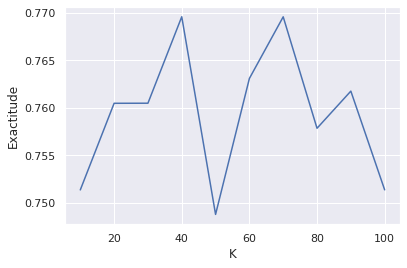

In [17]:
sns.set_style("darkgrid")
_ = plt.plot(kvals, scores)
_ = plt.xlabel('K')
_ = plt.ylabel('Exactitude')

knn_score = max(scores)
k_opt = kvals[scores.index(knn_score)]

knn = KNNImputer(n_neighbors=k_opt, missing_values=np.nan)
Xknn = knn.fit_transform(Xnorm)

df_knn[Xcol] = Xknn

print(
    "[Meilleur K-NN] Estimation RF (n = %d, k opt = %d, CV à 5 plis): %2.1f %%" % (
        len(Xknn), k_opt, 100*knn_score)
)

#### Comparons maintenant les résultats des multiples méthodes d'imputation testées.

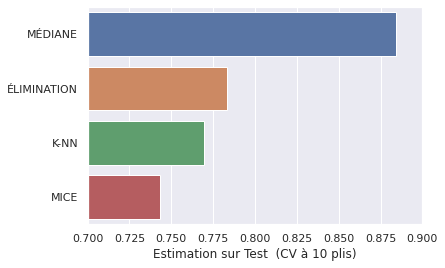

In [18]:
errs = {
    'K-NN': knn_score,
    'MICE': mice_score,
    'MÉDIANE': mediane_score,
    'ÉLIMINATION': elimine_score,
}

err_df = pd.DataFrame.from_dict(errs, orient='index')
err_df.reset_index(inplace=True)
err_df.columns = ['Imputation', 'Score']

ax = sns.barplot(
    x=err_df.columns[1],
    y=err_df.columns[0],
    order=err_df.sort_values('Score', ascending=False).Imputation,
    data=err_df,
)
ax.set_ylabel('')
ax.set_xlabel('Estimation sur Test  (CV à 10 plis)')
_ = plt.xlim(0.7, 0.9)

### Que faut-il comprendre de ce graphique ?

Si on complète les données manquantes avec divers modèles, on peut améliorer le pouvoir de
prédiction (en ajoutant un biais dans les données).

Notez à quel point la simple élimination des données manquantes, bien qu'intuitive, n'est 
pas efficace. En creusant un peu plus, on est passés d'un score d'environ 79 % à 88 % juste en remplaçant les valeurs manquantes par les valeurs médianes correspondantes. Appelons la valeur obtenue avec la médiane, la valeur de base (*baseline*).

Notez également que les méthodes complexes d'imputation ne sont pas toujours les meilleures. C'est du cas par cas, en fonction du jeu de données à traiter. Dans cet exemple, il manque tellement de valeurs des variables *SkinThickness* et *Insulin* que les méthodes d'interpolation MICE et KNN performent mal.
 
Les quatres méthodes d'imputation sont souvent utilisées ensemble pour trouver la meilleure à utiliser par la suite.

Pour le reste de ce script, nous allons utiliser les valeurs imputées au moyen de la méthode de la médiane.

## Partie II: Le traitement des valeurs aberrantes

<p>&nbsp;</p>
<div align="center">
    <img src= https://drive.google.com/uc?id=1zCMpsltZ--jYZlbcb14xTGekx93s-NN4  width="300" />
    <div>
    <font size="1.5">Image Source: https://beyondrecognition.net/insights-from-outliers//</font>
    </div>
</div>
<p>&nbsp;</p>


On peut détecter la présence de variables aberrantes (*outliers*) dans un jeu de données en utilisant des diagrammes en boîtes à moustaches (*box plots*), mais nous allons plutôt utiliser les distributions conjointes des variables.

#### Affichage des distributions conjointes des variables numériques

Ce type de diagramme met en valeur les corrélations multiples entre les variables ainsi que les valeurs aberrantes. Cette opération est un peu longue à effectuer.

In [19]:
df2 = df_mediane.copy(deep=True)

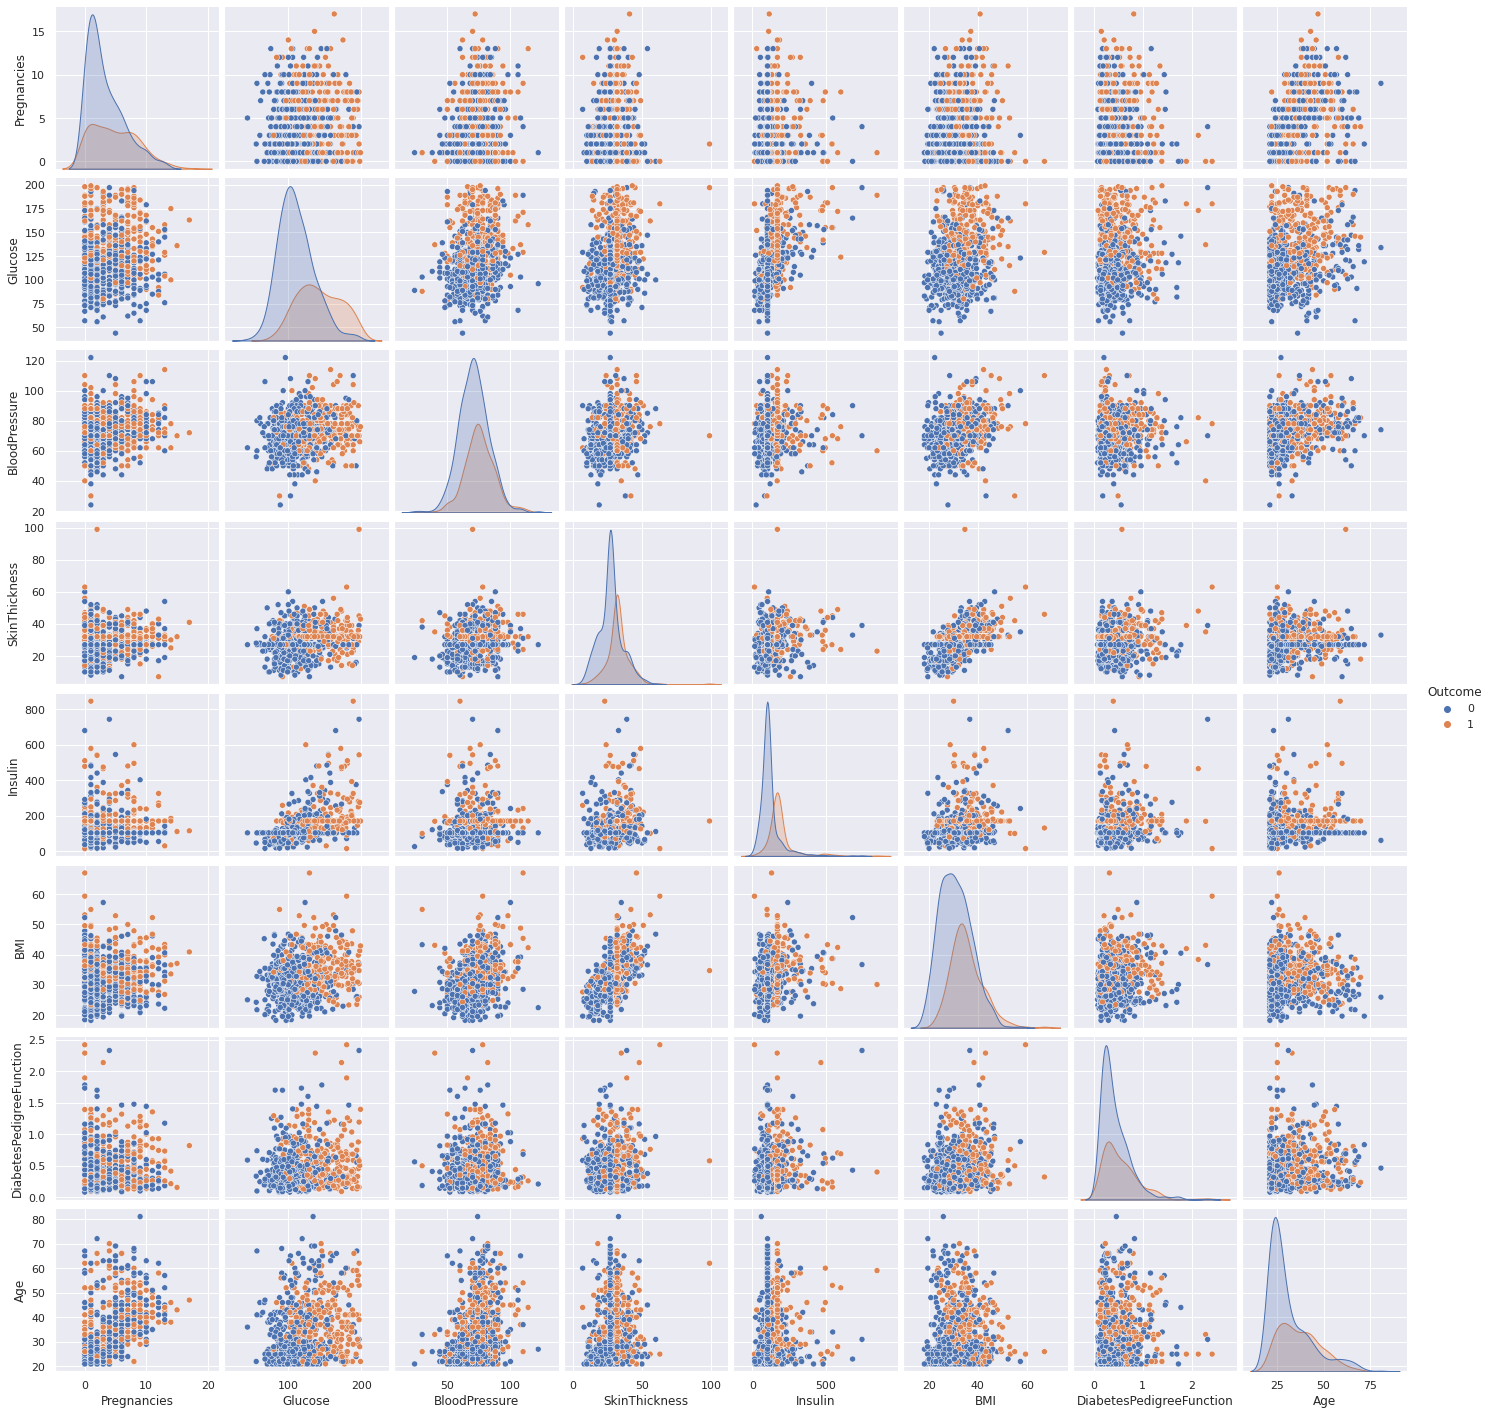

In [20]:
sns.pairplot(df2, hue='Outcome')

Les pics observables dans les valeurs de *SkinThickness* et *Insulin* sont dus au remplacement d'un grand nombre de valeurs manquantes pour ces deux variables.

Bien que ces pics semblent artificiels dans les nuages de données, il faut se rappeler que l'ajout de données par imputation améliore les performances en classification.

On remarque que plusieurs variables sont fortement corrélées entre elles; ex. *SkinThickness* et *BMI*. Ce n'est pas surprenant puisque les gens en surpoids ont un indice de masse corporel (BMI) et une épaisseur de peau plus élevés. 

On remarque également que les sujets diabétiques (en orange) ont des niveaux plus élevés de chaque caractéristique. Les points oranges sont déplacés vers la droite dans chaque panneau. 

Les bornes supérieures des histogrammes le long de la diagonale principale sont très étendues pour plusieurs variables. Cela révèle souvent la présence de valeurs aberrantes.

### Comment traiter les valeurs aberrantes?

Dans ce qui suit, on va supposer, pour l'exemple, 
que la base de données contient jusqu'à 5 % de valeurs aberrantes de toutes sortes. Ça représente $0,05*768 \approx 38$ valeurs.

On utilise la méthode de la [forêt d'isolation](https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) pour détecter un maximum de 5 % des valeurs possiblement aberrantes. 

N.B. La méthode IsolationForest mesure la distance entre les différents points dans l'espace des variables d'entrée. Comme on a vu précédemment, celles-ci varient sur différents ordres de grandeur. Il faut donc les normaliser. Cette normalisation est utilisée uniquement pour identifier les données avec des valeurs aberrantes. On retourne ensuite aux variables non normalisées.

In [21]:
def elimine_valeurs_aberrantes(data, contamination):
    df3 = data.copy(deep=True)
    
    # Noms des variables d'entrée
    Xcol = df3.drop(['Outcome'], axis=1).columns.to_list()
    
    # Normalisation des variables d'entrées
    scaler = StandardScaler()
    df3[Xcol] = scaler.fit_transform(df3[Xcol])

    # Détection des valeurs aberrantes. Cette fonction ajoute une variable outliers 
    # dans le dataframe. La variable outliers vaut -1 pour les valeurs aberrantes 
    # et +1 pour les autres
    i_forest = IsolationForest(contamination=contamination)
    df3['outliers'] = i_forest.fit(df3[Xcol]).predict(df3[Xcol])
    
    # Élimination des valeurs aberrantes des données originales. 
    # On conserve ainsi les variables originales, sans normalisation.
    data.drop(df3[df3.outliers < 0].index, inplace = True)
    
    return data

#### Élimination des valeurs aberrantes.

Cette opération est un peu longue à effectuer.

In [22]:
n_avant = df2.shape[0]
df2 = elimine_valeurs_aberrantes(df2, 0.05)

n_apres = df2.shape[0]

print('Nombre de valeurs aberrantes éliminées : %d' % (n_avant-n_apres))

Nombre de valeurs aberrantes éliminées : 39


Appliquons le même classificateur par forêt aléatoire que précédemment afin de voir si l'exactitude a été améliorée 
en retirant 5 % des valeurs.

In [23]:
X = df2[Xcol]
Y = df2[Ycol]

# Entraînement du classificateur
mediane2_score = cross_val_score(rf, X, Y, cv=5, n_jobs=2).mean()

print(
    "[MÉDIANE] Estimation RF (n = %d, CV à 5 plis): %2.1f %%" 
    % (len(Xcol), 100*mediane2_score)
)

[MÉDIANE] Estimation RF (n = 8, CV à 5 plis): 88.9 %


Les performances de classification sont similaires à la *baseline*. N.B. Si on retire trop de données, on retire aussi les cas les plus difficiles à classifier! Il est normal alors que les performances s'améliorent dans ce cas. 

Affichons à nouveau les distributions conjointes des variables. Cette opération est un peu longue à effectuer.

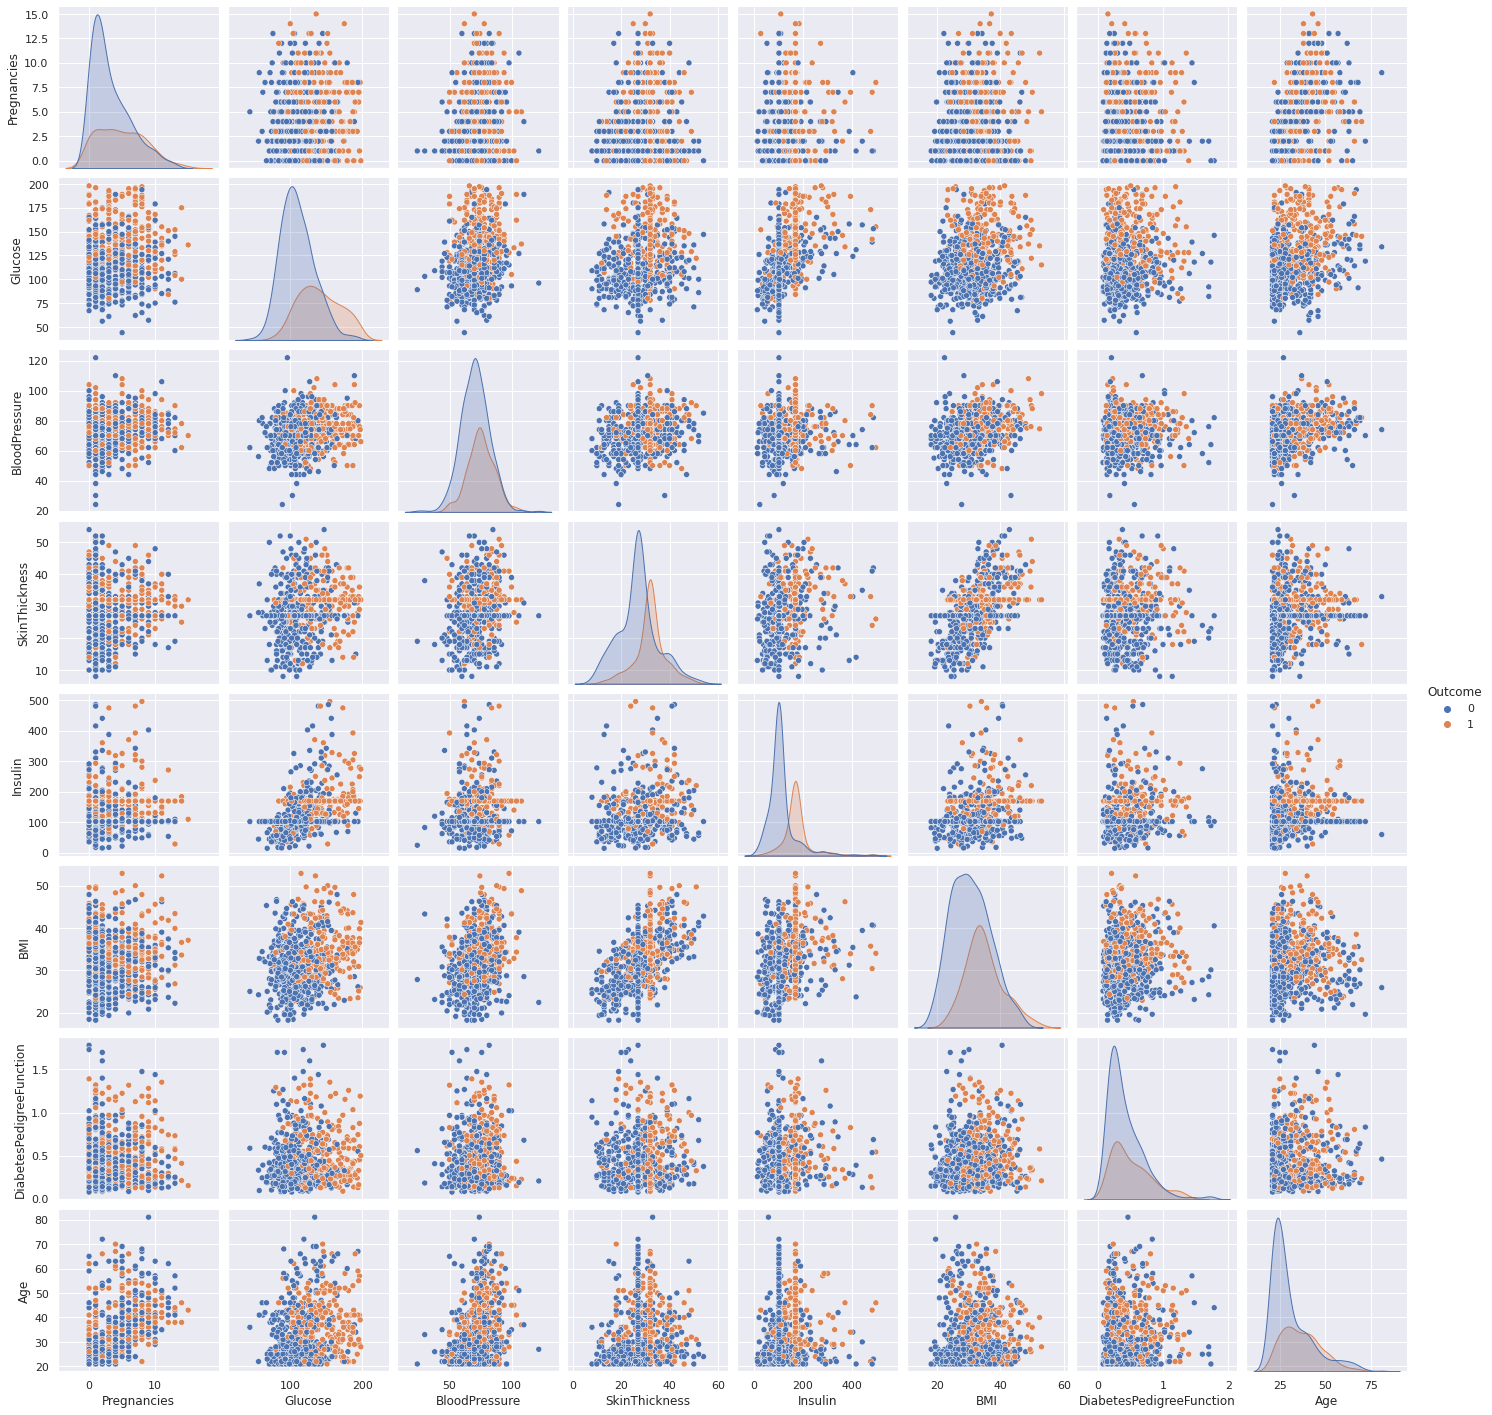

In [24]:
sns.pairplot(df2, hue='Outcome')

Les nuages de points sont plus compacts et les valeurs aberrantes ont disparues. Notez que les lignes horizontales et verticales causées par l'imputation des données pour les données de SkinThickness et Insulin sont encore plus visibles maintenant.

**EXERCICE:**

Montrez comment les performances du classificateur changent lorsque le taux de contamination varie entre 1% et 50%. Comment interprétez vous ces résultats? Quelles conclusions en tirez-vous?

**SOLUTION:**

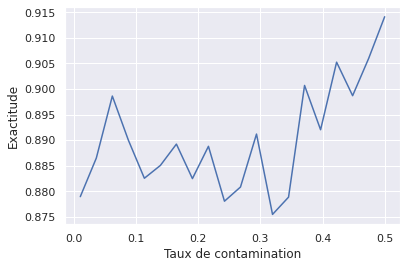

In [25]:
taux= np.linspace(0.01, 0.50, 20)
score = np.zeros(20)

for i,frac in enumerate(taux):
    df2 = df_mediane.copy(deep=True)
    df2 = elimine_valeurs_aberrantes(df2, frac)

    X = df2[Xcol]
    Y = df2[Ycol]

    score[i] = cross_val_score(rf, X, Y, cv=5, n_jobs=2).mean()


plt.plot(taux, score)
plt.xlabel('Taux de contamination')
plt.ylabel('Exactitude')
plt.show() 

**OBSERVATIONS**: les performances sont assez stables pour un taux de contamination inférieur à 35%. Éliminer ces données a peu d'impact sur les performances. L'exactitude augmente ensuite avec le taux de contamination. Cela veut dire qu'on élimine les données les plus difficiles à classifier, en élaguant les données en périphérie des regroupements. Cela facilite la tâche du classificateur, et donc améliore ses performances.

## Partie III: Transformation des variables

<p>&nbsp;</p>
<div align="center">
    <img src= https://drive.google.com/uc?id=1aKbVIsFEdmiSIkSXt4SCTXt48FogCS-N  width="400" />
    <div>
    <font size="1.5">Image Source: https://webstockreview.net/explore/lab-clipart-chemical-reaction/</font>
    </div>
</div>
<p>&nbsp;</p>


Affichons les histogrammes des variables corrigées avec la méthode médiane.

In [26]:
df2 = df_mediane.copy(deep=True)

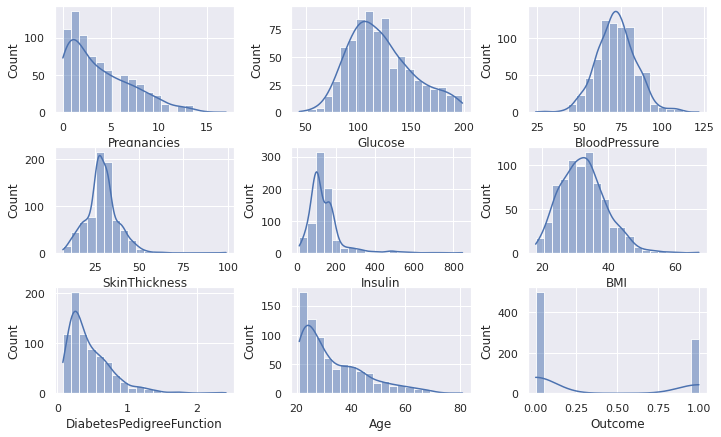

In [27]:
feature_cols = df2.columns.to_list()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))
plt.tight_layout()

for col, ax in zip(feature_cols, axes.flatten()):
    sns.histplot(data=df2, x=col, ax=ax, bins=20, kde=True)

On remarque que les variables *SkinThickness*, *Insulin* et *BMI* ressemblent à des gaussiennes. Transformons-les en gaussiennes en utilisant la transformation par quantile.

In [28]:
features = ['SkinThickness', 'Insulin', 'BMI']

for col in features:
    X = df2[col]
    X = np.array(X).reshape(-1, 1)    
    X = QuantileTransformer(output_distribution='normal').fit_transform(X)
    df2[col] = X

Affichons à nouveau les histogrammes.

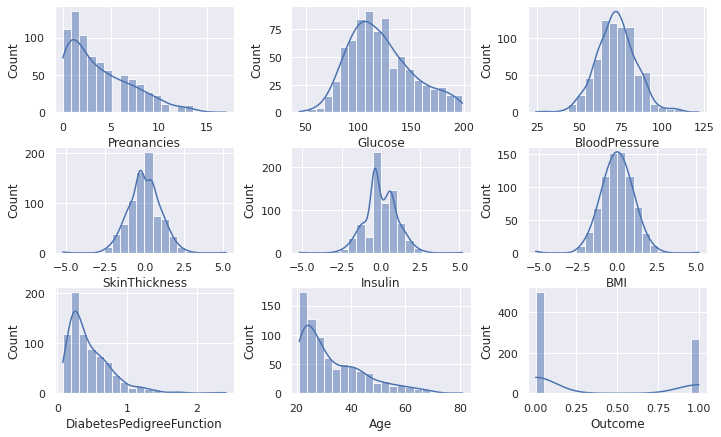

In [29]:
feature_cols = df2.columns.to_list()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))
plt.tight_layout()

for col, ax in zip(feature_cols, axes.flatten()):
    sns.histplot(data=df2, x=col, ax=ax, bins=20, kde=True)

Les nouveaux histogrammes pour les variables *SkinThickness*, *Insulin* et *BMI* sont ont des distributions plus gaussiennes qu'auparavant.

Appliquons le même classificateur que précédemment afin de voir si l'exactitude a été améliorée en transformant ces variables.

In [30]:
X = df2[Xcol]
Y = df2[Ycol]

mediane2_score = cross_val_score(rf, X, Y, cv=5, n_jobs=2).mean()

print(
    "[MÉDIANE] Estimation RF (n = %d, CV à 5 plis): %2.1f %%" 
    % (len(Xcol), 100*mediane2_score)
)

[MÉDIANE] Estimation RF (n = 8, CV à 5 plis): 87.6 %


Les performances de classification sont similaires à la valeur de base.

## Partie IV: Élimination de variables fortement corrélées entre elles

Il arrive souvent qu'un jeu de données contiennent des variables X fortement corrélées entre elles. Plusieurs 
types de classificateurs sont affectées par ce problème, mais d'autres le sont moins, sinon pas du tout.

Voici un exemple typique de variables corrélées: le nombre d'items similaires achetés est proportionnel au prix payé pour l'ensemble des items. Les deux variables sont parfaitement corrélées; la première peut être déterminée à partir de la seconde. On peut laisser tomber l'une des deux.

Examinons la matrice de corrélation des variables.

On utilise la valeurs corrigées avec la méthode médiane.

In [31]:
df2 = df_mediane.copy(deep=True)

#### Calcul de la matrice de corrélation

In [32]:
corr = df2.corr()

#### Affichage des résultats avec la réponse *Outcome* en tête et les variables en ordre décroissant de corrélation

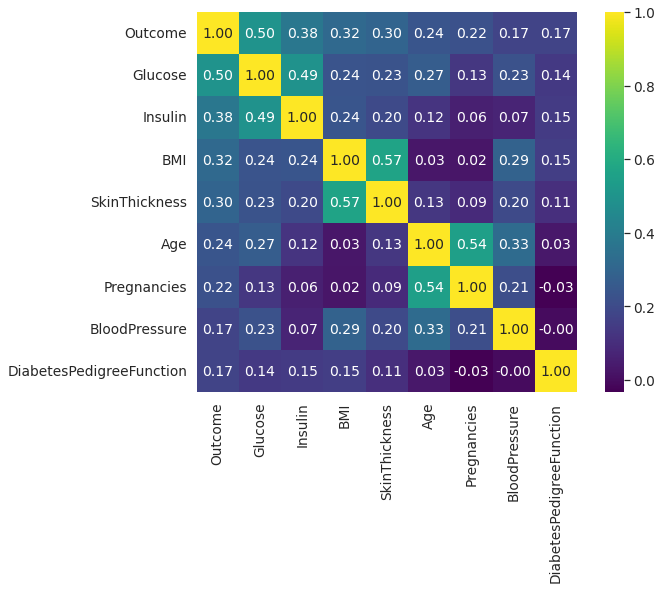

In [33]:
nvar = len(df2.columns)

plt.figure(figsize=(10, 7))
cols = corr.nlargest(nvar, 'Outcome')['Outcome'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 14}, yticklabels=cols.values, 
                 xticklabels=cols.values, cmap="viridis")
plt.show()

Examinons les termes sous la diagonale en jaune. Les termes au-dessus ont les mêmes valeurs puisqu'une 
matrice de corrélation est symétrique. 

On peut faire les observations suivantes:
<ul>
<li>les corrélations significatives sont positives; les variables augmentent avec les autres,</li>
<li>le nombre de grossesses augmente avec l'âge,</li>
<li>le taux de glucose augmente avec le taux d'insuline dans le sang,</li>
<li>l'indice de masse corporelle augmente avec l'épaisseur de la peau,</li>
<li>le taux de glucose a le plus grand effet sur la probabilité d'être diabétique.</li>
</ul>

Une analyse plus approfondie nous permettra de mieux discerner les effets de chaque variable X sur la probabilité d'être diabétique. L'importance des variables choisies par un classificateur pour prédire la variable Outcome nous donne des indices. 

Mis à part sur la diagonale, il n'y a pas de corrélations supérieures à 60%. On n'a pas besoin d'éliminer des variables fortement corrélées avec d'autres.

### Comment réduire l'effet des données corrélées ?

Supposons, pour l'exemple, que l'on décide d'éliminer la corrélation entre les variables *BMI* et *SkinThickness*. Il suffit d'enlever une des deux de la base de données.

Enlevons la variable *SkinThickness*.

In [34]:
df2 = df2.drop(['SkinThickness'], axis=1)

Appliquons le même classificateur par forêt aléatoire que précédemment afin de voir si l'exactitude a été améliorée 
en retirant cette variable.

In [35]:
# Attention, le nombre de variables en X a changé!
Xcol2 = df2.drop(['Outcome'], axis=1).columns.to_list()
Ycol2 = 'Outcome'

X = df2[Xcol2]
Y = df2[Ycol2]

mediane2_score = cross_val_score(rf, X, Y, cv=5, n_jobs=2).mean()

print(
    "[MÉDIANE] Estimation RF (n = %d, CV à 5 plis): %2.1f %%" 
    % (len(Xcol), 100*mediane2_score)
)

[MÉDIANE] Estimation RF (n = 8, CV à 5 plis): 88.4 %


Encore une fois, les performances de classification sont similaires à la valeur de base (*baseline*).

## Partie V: Sauvegarde des données traitées.

<p>&nbsp;</p>
<div align="center">
    <img src= https://drive.google.com/uc?id=1h7gCmIWlmFCJrzH9HgwCCa84WWKPM1Dk  width="400" />
    <div>
    <font size="1.5">Image Source: https://medium.com/swlh/data-cleaning-with-pandas-e9796d1ff9c9/</font>
    </div>
</div>
<p>&nbsp;</p>

Dans ce script, on a testé séparément différentes méthodes de prétraitement des données :
<ul>
<li>le traitement des valeurs manquantes,</li>
<li>le traitement des valeurs aberrantes,</li>
<li>la transformation des variables,</li>
<li>l'élimination des variables fortement corrélées.</li>
</ul>

Seule l'étape de traitement des valeurs manquantes a montré une amélioration des performances du classificateur par forêt aléatoire. Les autres étapes ont eu des effets négligeables. 

Toutes les données du jeu de données ont été utilisées pour effectuer cette analyse exploratoire. Nous allons maintenant nettoyer la base de données et la sauvegarder afin de pouvoir l'utiliser dans le tutoriel sur la sélection et l'optimisation d'un modèle optimal. 

#### Prétraitement et sauvegarde des données

In [36]:
# Lecture des données
df = pd.read_csv('diabetes.csv')

# Remplacement des valeurs manquantes, indiquées par des zéros, avec des NaN.
features = df.drop(['Outcome', 'Pregnancies'], axis=1).columns.to_list()

for col in features:
    df.loc[df[df[col] == 0].index, col] = np.nan
    
# Imputation des valeurs manquantes avec la médiane
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for var in features:
    assigne_mediane(df, var)
    
# Sauvegarde des données corrigées
df.to_csv('diabetes_nettoyee.csv', index = False)